# Generating Deviates Other than Unif[0,1]

We discuss several methods for generating random deviates including:

* Inverse Method (Lange 22.3)
* Box-Mueller method for Normals (Lange 22.4)
* Deviates by Definition (Lange 22.8)

Deviates by definition is particularly useful for generating data from mixture distributions, many of which will not have built in implementations in R or Python.

Here we focus on code. See the Lange references for justification of mathematical ideas.

## Inverse Method

### Custom Density

Draw $X$ from the density

$$ f(x) = \frac{x}{2} $$

for $0 \leq x \leq 2$, 0 otherwise. The inverse method shows that if $U \sim Unif[0,1]$ then $X = 2\sqrt{U}$ has the density $f$.

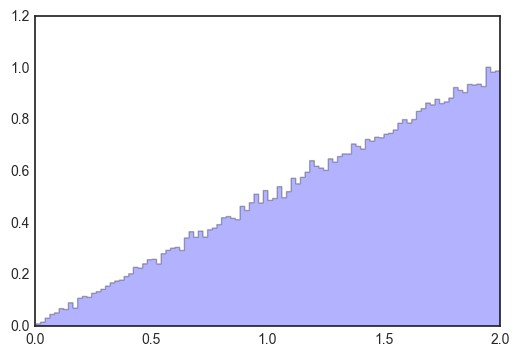

In [113]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

n = 1000
U = np.random.uniform(size=n)
X = 2*np.sqrt(U)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=50)
plt.hist(X, **kwargs);

### Exponential Distribution

In [13]:

n = 10000
beta = 4
x = np.random.exponential(scale=beta,size=n)

In [14]:
y = -beta*np.log(np.random.uniform(size=n))

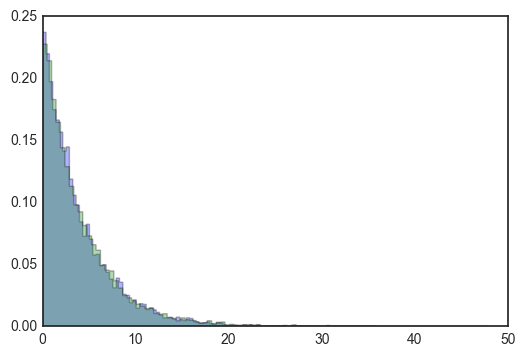

In [16]:
## compare our derived equation to numpy built in expo
## generator
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=100)

plt.hist(x, **kwargs)
plt.hist(y, **kwargs);

## Box Mueller for Standard Normal

In [50]:
## generates standard uniforms according to box mueller
def StandardNormal(n):
    ## if n odd, generate n+1 deviates
    n2 = int(np.ceil(n/2))
    U = np.random.uniform(size=n2)
    V = np.random.uniform(size=n2)
    theta = 2*np.pi*U
    R = np.sqrt(-2*np.log(V))
    X = R*np.cos(theta)
    Y = R*np.sin(theta)
    Z = np.concatenate((X,Y))
    ## if n odd, remove 0th deviate
    if n % 2 != 0:
        Z = Z[1:]
    return Z


n = 10990
X = StandardNormal(n)



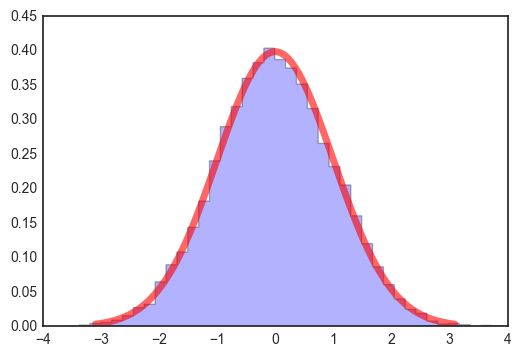

In [51]:
from scipy.stats import norm
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
x = np.linspace(norm.ppf(0.001),norm.ppf(0.999), 100)
plt.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
plt.hist(X, **kwargs);





## Deviates by Definition

In [104]:
### create 3 function to draw a single deviate from
def F1():
    return np.random.normal(loc=0.0,scale=1.0,size=1)

def F2():
    return np.random.normal(loc=3.0,scale=1.0,size=1)

def F3():
    return np.random.normal(loc=4.0,scale=0.1,size=1)


F = [f1,f2,f3]

In [105]:
p1 = 0.3
p2 = 0.6
p3 = 0.1
n = 10000
U = np.random.uniform(size=n)
Z = np.ones(n,dtype=np.int)
Z[U < p1] = 0
Z[np.bitwise_and(U > p1,U < p2 + p1)] = 1
Z[U > p1 + p2] = 2
Z

array([1, 2, 1, ..., 1, 1, 0])

In [106]:
a[Z[0]]()

array([ 2.61528471])

In [107]:
X = np.zeros(n)
for ii in np.arange(n):
    X[ii] = a[Z[ii]]()


In [108]:
X

array([ 2.43554999,  3.87686099,  2.08095628, ...,  4.22648163,
        3.64998263,  1.00337962])

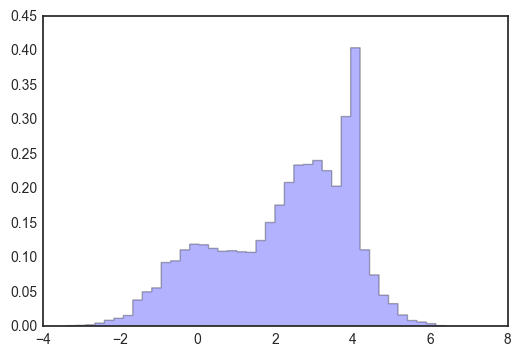

In [109]:
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
plt.hist(X, **kwargs);

This is known as a Gaussian mixture model. In future classes we will discuss the process of going from the data, back to the parameters (the proportions $p_1$, $p_2$, $p_3$ and the normal means and variances). This is known as statistical inference. There are many other types of mixtures one could consider: exponential, double exponential, t, etc. 